<a href="https://colab.research.google.com/github/mrunalkute/DS-Machine-Learning-Assignments/blob/Homework/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Data Wrangling
### `! git clone https://github.com/ds3001f25/wrangling_assignment.git`
### Do Q1 and Q2
### Reading material: `tidy_data.pdf`

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture `./data/justice_data.parquet`, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Q1:1


In [ ]:
df_air = pd.read_csv('airbnb_hw.csv')
df_air.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [ ]:
df_air['Price'].value_counts()
print(df_air['Price'].unique(),'\n')

before = df_air['Price'].notna().sum() #30478


df_air['Price'] = pd.to_numeric(df_air['Price'], errors='coerce') #Convert to numeric to get rid of commas
print(df_air['Price'].unique(),'\n')
df_air['Price'].tail()


after= df_air['Price'].notna().sum() #30297

before - after #181 missing values

['145' '37' '28' '199' '549' '149' '250' '90' '270' '290' '170' '59' '49'
 '68' '285' '75' '100' '150' '700' '125' '175' '40' '89' '95' '99' '499'
 '120' '79' '110' '180' '143' '230' '350' '135' '85' '60' '70' '55' '44'
 '200' '165' '115' '74' '84' '129' '50' '185' '80' '190' '140' '45' '65'
 '225' '600' '109' '1,990' '73' '240' '72' '105' '155' '160' '42' '132'
 '117' '295' '280' '159' '107' '69' '239' '220' '399' '130' '375' '585'
 '275' '139' '260' '35' '133' '300' '289' '179' '98' '195' '29' '27' '39'
 '249' '192' '142' '169' '1,000' '131' '138' '113' '122' '329' '101' '475'
 '238' '272' '308' '126' '235' '315' '248' '128' '56' '207' '450' '215'
 '210' '385' '445' '136' '247' '118' '77' '76' '92' '198' '205' '299'
 '222' '245' '104' '153' '349' '114' '320' '292' '226' '420' '500' '325'
 '307' '78' '265' '108' '123' '189' '32' '58' '86' '219' '800' '335' '63'
 '229' '425' '67' '87' '1,200' '158' '650' '234' '310' '695' '400' '166'
 '119' '62' '168' '340' '479' '43' '395' '144' '52' 

np.int64(181)

Q1:2

In [ ]:
df_police=pd.read_csv('mn_police_use_of_force.csv')
df_police.head()

,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,NaN,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West


In [ ]:
print(df_police['subject_injury'].unique(),'\n')
print(df_police['subject_injury'].value_counts(dropna=False), '\n') #9848 NaN
df_police_new= df_police.dropna(subset=['subject_injury']) #Get rid of rows with NA
print(df_police_new['subject_injury'].unique(),'\n')
df_police_new['subject_injury'].value_counts() #Missing 9848 values, 76% of the values

[nan 'No' 'Yes'] 

subject_injury
NaN    9848
Yes    1631
No     1446
Name: count, dtype: int64 

['No' 'Yes'] 



,count
subject_injury,
Yes,1631
No,1446


In [ ]:
pd.crosstab(df_police['subject_injury'], df_police['force_type'], dropna=False)

force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal,Less Lethal Projectile,Maximal Restraint Technique,Police K9 Bite,Taser
subject_injury,,,,,,,,,,,
No,0,1093,131,2,33,34,0,1,0,2,150
Yes,2,1286,41,0,44,40,0,2,0,44,172
NaN,2,7051,1421,0,27,74,87,0,170,31,985


In [ ]:
pd.crosstab(df_police_new['subject_injury'], df_police['force_type'], dropna=False)
#Missing data tends to occur during force types that only require the body, or with a less lethal method, such as a chemical irritant

force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal Projectile,Police K9 Bite,Taser
subject_injury,,,,,,,,,
No,0,1093,131,2,33,34,1,2,150
Yes,2,1286,41,0,44,40,2,44,172


Q1:3


In [ ]:
df = pd.read_parquet('justice_data.parquet')
df.head()

,InternalStudyID,REQ_REC#,Defendant_Sex,Defendant_Race,Defendant_BirthYear,Defendant_Age,Defendant_AgeGroup,Defendant_AgeatCurrentArrest,Defendant_AttorneyTypeAtCaseClosure,Defendant_IndigencyStatus,...,NewFelonySexualAssaultArrest_OffDate,NewFelonySexualAssaultArrest_ArrestDate,NewFelonySexualAssaultArrest_DaysBetweenContactEventandOffDate,NewFelonySexualAssaultArrest_DaysBetweenOffDateandArrestDate,NewFelonySexualAssaultArrest_DaysBetweenReleaseDateandOffDate,NewFelonySexualAssaultArrest_Disposition,Intertnalindicator_ReasonforExcludingFromFollowUpAnalysis,CriminalHistoryRecordsReturnedorCMSRecordsFoundforIndividual,DispRecordFoundforChargesinOct2017Contact_Atleast1dispfound,CrimeCommission2021ReportClassificationofDefendants
0,ADI00001,1,M,W,1986,31,3,31,99,99,...,,,,999,999,,4,1,0,Defendant could not be classified or tracked d...
1,ADI00007,3,M,B,1956,60,6,60,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
2,ADI00008,4,M,W,1990,27,3,27,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
3,CDI00036,6,M,B,1989,27,3,27,0,0,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
4,CDI00038,7,F,W,1988,28,3,28,0,0,...,,,,999,999,,0,1,1,New criminal offense punishable by incarcerati...


In [ ]:
print(df.dtypes)
print(df.shape)
print(df.columns,'\n')

InternalStudyID                                                 object
REQ_REC#                                                        object
Defendant_Sex                                                   object
Defendant_Race                                                  object
Defendant_BirthYear                                             object
                                                                 ...  
NewFelonySexualAssaultArrest_Disposition                        object
Intertnalindicator_ReasonforExcludingFromFollowUpAnalysis        int64
CriminalHistoryRecordsReturnedorCMSRecordsFoundforIndividual    object
DispRecordFoundforChargesinOct2017Contact_Atleast1dispfound      int64
CrimeCommission2021ReportClassificationofDefendants             object
Length: 709, dtype: object
(22986, 709)
Index(['InternalStudyID', 'REQ_REC#', 'Defendant_Sex', 'Defendant_Race',
       'Defendant_BirthYear', 'Defendant_Age', 'Defendant_AgeGroup',
       'Defendant_AgeatCurrentArrest'

In [ ]:
#Clean 'WhetherDefendantWasReleasedPretrial", replace missing values with np.nan
df = df.rename(columns={'WhetherDefendantWasReleasedPretrial':'ReleasedPretrial'}) #Rename column

In [ ]:
df["ReleasedPretrial"].head()
df["ReleasedPretrial"].value_counts()
print(df['ReleasedPretrial'].unique(),'\n')
df['ReleasedPretrial'] = pd.to_numeric(df['ReleasedPretrial'], errors='coerce')
df['ReleasedPretrial']= df['ReleasedPretrial'].replace(0,np.nan)
df['ReleasedPretrial'] = df['ReleasedPretrial'].astype('Int64')
df["ReleasedPretrial"].head()

[9 0 1] 



,ReleasedPretrial
0,9
1,<NA>
2,<NA>
3,<NA>
4,1


Q1:4

In [ ]:
df = df.rename(columns={'ImposedSentenceAllChargeInContactEvent':'ImposedSentence'}) #Rename column
df["ImposedSentence"].head()

,ImposedSentence
0,
1,60
2,12
3,.985626283367556
4,


In [ ]:
print(df['ImposedSentence'].unique(),'\n')
df["ImposedSentence"] = pd.to_numeric(df["ImposedSentence"], errors='coerce') #Replace ' ' with nan
print(df['ImposedSentence'].unique(),'\n')
df["ImposedSentence"].head()
df["ImposedSentence"] = np.ceil(df["ImposedSentence"]) #Round up decimal values
print(df['ImposedSentence'].unique(),'\n')
df["ImposedSentence"].head()
df['ImposedSentence'] = df['ImposedSentence'].astype('Int64') #Change to integer to get rid of decimal
print(df['ImposedSentence'].unique(),'\n')
df["ImposedSentence"].head()

[' ' '60' '12' '.985626283367556' '36' '6' '24' '5.91375770020534' '120'
 '72' '11.9917864476386' '0' '2.95687885010267' '84' '108' '300' '240'
 '180' '4' '96' '2' '54' '.328542094455852' '44' '5' '115' '132' '48'
 '258' '34' '76' '.164271047227926' '.131416837782341' '111' '9' '3'
 '1.97125256673511' '36.9856262833676' '.0657084188911704'
 '35.4928131416838' '106.492813141684' '8' '35' '18.3141683778234' '480'
 '32' '93' '234' '732' '1.16427104722793' '4.6570841889117' '21' '7'
 '4.49281314168378' '18' '600' '43.1642710472279' '179' '52' '30' '20'
 '192' '702' '14' '55' '53' '11.9055441478439' '114' '35.0061601642711'
 '68' '.657084188911704' '46.6242299794661' '102' '65' '200' '57'
 '24.3285420944559' '12.1642710472279' '117' '81.4928131416838'
 '22.4928131416838' '1980' '3.6570841889117' '56' '10' '2.79260780287474'
 '1' '47' '22' '1500' '40' '284' '11' '118' '42' '162' '156'
 '47.2956878850103' '105' '51' '246' '29' '75' '324' '360'
 '34.4804928131417' '120.328542094456' '59.926078

,ImposedSentence
0,<NA>
1,60
2,12
3,1
4,<NA>


In [ ]:
df['SentenceTypeAllChargesAtConvictionInContactEvent'] .head()

,SentenceTypeAllChargesAtConvictionInContactEvent
0,9
1,0
2,1
3,1
4,4


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks (Hint: `GSAF5.xls`).

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

Q2:1

In [ ]:
df1= pd.read_excel('GSAF5.xls')
df1.head()
df1.tail()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
7037,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,...,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,NaN,NaN
7038,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,...,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,NaN,NaN
7039,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,...,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,NaN,NaN
7040,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,...,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,NaN,NaN
7041,1845-1853,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,15,...,NaN,S.W. Baker,ND-0001-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0001,ND.0001,2.0,NaN,NaN


Q2:2

In [ ]:
print(df1.columns)
print(df1['pdf'].unique(),'\n')
print(df1['href formula'].unique(),'\n')
print(df1['href'].unique(),'\n')
print(df1['original order'].unique(),'\n')
print(df1['Unnamed: 22'].unique(),'\n')
print(df1['Case Number'].unique(),'\n')
print(df1['Case Number.1'].unique(),'\n')
print(df1['Unnamed: 21'].unique(),'\n')

empty_cols = df.columns[df.isnull().all()]
print("Columns with no values at all:", empty_cols.tolist())
# All columns have at least one value, dropped the ones with seemingly less relevant data

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')
[nan 'The Standard, 10/08/2022' '2022.09.25-Plett.pdf' ...
 'ND-0003-Ocracoke_1900-1905.pdf' 'ND-0002-JulesPatterson.pdf'
 'ND-0001-Ceylon.pdf'] 

[nan
 'http://sharkattackfile.net/spreadsheets/pdf_directory/2022.09.25-Plett.pdf'
 'http://sharkattackfile.net/spreadsheets/pdf_directory/2022.09.06-Bahamas.pdf'
 ...
 'http://sharkattackfile.net/spreadsheets/pdf_directory/ND-0003-Ocracoke_1900-1905.pdf'
 'http://sharkattackfile.net/spreadsheets/pdf_directory/ND-0002-JulesPatterson.pdf'
 'http://sharkattackfile.net/spreadsheets/pdf_directoryND-0001-Ceylon.pdf'] 

[nan
 'http://sharkattackfile.net/spreadsheets/pdf_directory/2022.09.25-Plett.pdf'
 'http://sharkattackfile.net/spreadsheets/pdf_d

In [ ]:
list = ["pdf", "href formula", "href", "Unnamed: 22", "Unnamed: 21"]
new_df1 = df1.drop(list, axis=1)
print( new_df1.columns, '\n', new_df1.shape)
new_df1.head()

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ',
       'Source', 'Case Number', 'Case Number.1', 'original order'],
      dtype='object') 
 (7042, 18)


,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal Y/N,Time,Species,Source,Case Number,Case Number.1,original order
0,16th August 2025,2025.0,Provoked,USA,Florida,Cayo Costa Boca Grande,Fishing,Shawn Meuse,M,?,Laceration to right leg below the knee,N,1055 hrs,Lemon shark 1.8 m (6ft),Johannes Marchand: Kevin McMurray Trackingshar...,NaN,NaN,NaN
1,18th August,2025.0,Unprovoked,Australia,NSW,Cabarita Beach,Surfing,Brad Ross,M,?,None sustained board severly damaged,N,0730hrs,5m (16.5ft) Great White,Bob Myatt GSAF The Guardian: 9 News: ABS News:...,NaN,NaN,NaN
2,17th August,2025.0,Unprovoked,Bahamas,Atlantic Ocean near Big Grand Cay,North of Grand Bahama near Freeport,Spearfishing,Not stated,M,63,Severe injuries no detail,N,1300hrs,Undetermined,Ralph Collier GSAF and Kevin MCMurray Tracking...,NaN,NaN,NaN
3,7th August,2025.0,Unprovoked,Australia,NSW,Tathra Beach,Surfing,Bowie Daley,M,9,None sustained board severely damaged,N,1630hrs,Suspected Great White,Bob Myatt GSAF,NaN,NaN,NaN
4,1st August,2025.0,Unprovoked,Puerto Rico,Carolina,Carolina Beach,Wading,Eleonora Boi,F,39,Bite to thigh area,N,Not stated,Undetermined,Kevin McMurray Trackingsharks.com: NY Post,NaN,NaN,NaN


Q2:3

In [ ]:
new_df1['Year'].head()
print(new_df1['Year'].value_counts(), '\n') #Values have a very large range, with some years that don't seem quite feasible (ex: 0)
conditional = (new_df1['Year'] >= 1940) & (new_df1['Year'] <= 2026)
df_time = new_df1[conditional]
df_time.head()

Year
2015.0    143
2017.0    141
2016.0    133
0.0       129
2011.0    128
         ... 
1723.0      1
1721.0      1
1703.0      1
5.0         1
2026.0      1
Name: count, Length: 261, dtype: int64 



,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal Y/N,Time,Species,Source,Case Number,Case Number.1,original order
0,16th August 2025,2025.0,Provoked,USA,Florida,Cayo Costa Boca Grande,Fishing,Shawn Meuse,M,?,Laceration to right leg below the knee,N,1055 hrs,Lemon shark 1.8 m (6ft),Johannes Marchand: Kevin McMurray Trackingshar...,NaN,NaN,NaN
1,18th August,2025.0,Unprovoked,Australia,NSW,Cabarita Beach,Surfing,Brad Ross,M,?,None sustained board severly damaged,N,0730hrs,5m (16.5ft) Great White,Bob Myatt GSAF The Guardian: 9 News: ABS News:...,NaN,NaN,NaN
2,17th August,2025.0,Unprovoked,Bahamas,Atlantic Ocean near Big Grand Cay,North of Grand Bahama near Freeport,Spearfishing,Not stated,M,63,Severe injuries no detail,N,1300hrs,Undetermined,Ralph Collier GSAF and Kevin MCMurray Tracking...,NaN,NaN,NaN
3,7th August,2025.0,Unprovoked,Australia,NSW,Tathra Beach,Surfing,Bowie Daley,M,9,None sustained board severely damaged,N,1630hrs,Suspected Great White,Bob Myatt GSAF,NaN,NaN,NaN
4,1st August,2025.0,Unprovoked,Puerto Rico,Carolina,Carolina Beach,Wading,Eleonora Boi,F,39,Bite to thigh area,N,Not stated,Undetermined,Kevin McMurray Trackingsharks.com: NY Post,NaN,NaN,NaN


Q2:4

['?' '63' '9' '39' '19' '7' '85' '69' '18' '66' '21' '40' '37' '16' '20'
 '12' '42' '26' '14' '45' '30' '30+' '56' '40+' '29' 35 58 29 24 20 55 17
 12 37 36 23 40 28 69 48 '60+' 57 45 61 27 38 16 68 33 30 15 41 14 43 26
 'Middle age' 18 21 49 25 46 19 65 64 '13' nan '11' '46' '32' '10' '64'
 '62' '22' '15' '52' '44' '47' '55' '59' '8' '50' '34' '38' '30s' '20/30'
 '35' '65' '20s' '77' '60' '49' '!2' '24' '73' '25' '50s' '58' '67' '17'
 '6' '41' '53' '68' '43' '51' '31' 39 51 10 13 60 '40s' 62 'teen' 8 22 32
 56 'Teen' 42 50 'M' 9 31 11 34 '!6' '!!' 47 7 71 59 53 54 75 '45 and 15'
 73 52 70 4 63 44 '28 & 22' '22, 57, 31' '60s' "20's" 67 74 '9 & 60'
 'a minor' 6 3 82 '40?' 66 72 '23' '36' '71' '48' '70' '18 months' '57'
 '28' '33' '61' '74' '27' '3' '28 & 26' '5' '54' '86' '18 or 20'
 '12 or 13' '46 & 34' '28, 23 & 30' 'Teens' 77 '36 & 26' '8 or 10' 84
 '\xa0 ' ' ' '30 or 36' '6½' '21 & ?' '33 or 37' 'mid-30s' '23 & 20' 5
 ' 30' '7      &    31' ' 28' '20?' "60's" '32 & 30' '16 to 18' '8

/tmp/ipython-input-970859979.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time['Age'] = pd.to_numeric(df_time['Age'], errors='coerce') # Coerce the variable to numeric
/tmp/ipython-input-970859979.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time['Age'] = df_time['Age'].astype('Int64') #Back to integer


<Axes: >

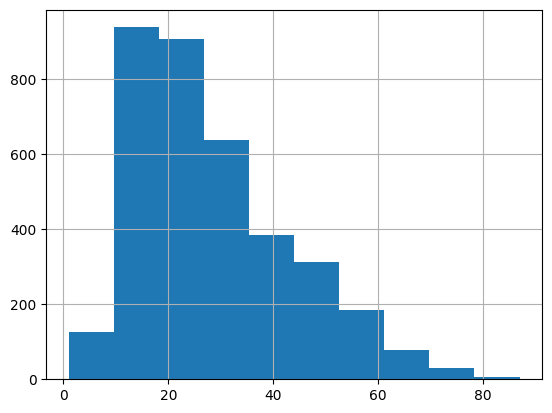

In [ ]:
df_time['Age'].head()
print(df_time['Age'].unique(), '\n')
df_time['Age'] = pd.to_numeric(df_time['Age'], errors='coerce') # Coerce the variable to numeric
print(df_time['Age'].unique(), '\n')
df_time['Age'].head()
df_time['Age'] = df_time['Age'].astype('Int64') #Back to integer
df_time['Age'].head()

df_time['Age'].hist() #Histogram

Q2:5

In [ ]:
print(df_time['Sex'].value_counts())
print(df_time['Sex'].unique())
df_time['Sex'] = df_time['Sex'].replace({
    'M ': 'M',
    'F ': 'F',
    ' M': 'M',
    'm': 'M',
    'lli': np.nan,
    'N': np.nan,
    '.': np.nan,
    "M x 2": 'M'
})
print(df_time['Sex'].unique())
print(df_time['Sex'].value_counts(dropna= False), '\n')

male_count = df_time['Sex'].str.contains("M", na=False).sum()
total_count = df_time['Sex'].notna().sum()
male_proportion = male_count / total_count
print(male_proportion)
#85.75% are male

Sex
M    4334
F     720
Name: count, dtype: int64
['M' 'F' nan]
['M' 'F' nan]
Sex
M      4334
F       720
NaN     453
Name: count, dtype: int64 

0.8575385833003561


/tmp/ipython-input-1459517680.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time['Sex'] = df_time['Sex'].replace({


Q2:6

In [ ]:
print(df_time["Type"].unique())
df_time['Type'] = df_time['Type'].replace({
    'Invalid': 'Unknown',
    'Questionable': 'Unknown',
    'unprovoked': 'Unprovoked',
    'Watercraft': 'Unknown',
    'Sea Disaster': 'Unknown',
    np.nan: 'Unknown',
    'Unconfirmed': 'Unknown',
    'Unverified': 'Unknown',
    'Under investigation': 'Unknown',
    'Boat': 'Unknown',
    '?': 'Unknown',
    ' Provoked': 'Provoked',
})
print(df_time["Type"].unique())
print(df_time["Type"].value_counts())

unprovoked_count = df_time['Type'].str.contains("Unprovoked", na=False).sum()
total_count = df_time['Type'].notna().sum()
unprovoked_proportion = unprovoked_count / total_count
print(unprovoked_proportion)

#74.41% are unprovoked

['Provoked' 'Unprovoked' 'Unknown']
['Provoked' 'Unprovoked' 'Unknown']
Type
Unprovoked    4098
Unknown        889
Provoked       520
Name: count, dtype: int64
0.7441438169602325


/tmp/ipython-input-3747772043.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time['Type'] = df_time['Type'].replace({


Q2: 7

In [ ]:
print(df_time["Fatal Y/N"].unique())
df_time['Fatal Y/N'] = df_time['Fatal Y/N'].replace({
    'N ': 'N',
    'F': 'Unknown',
    'M': 'Unknown',
    'n': 'N',
    'Nq' : 'N',
    'UNKNOWN': 'Unknown',
     2017 : 'Unknown',
    ' N': 'N',
    'Y x 2': 'Y',
    np.nan: 'Unknown'
})
print(df_time["Fatal Y/N"].unique())

['N' 'Y' 'F' 'M' nan 'n' 'Nq' 'UNKNOWN' 2017 'Y x 2' ' N']
['N' 'Y' 'Unknown']


/tmp/ipython-input-1695179604.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time['Fatal Y/N'] = df_time['Fatal Y/N'].replace({


Q2:8

In [ ]:
pd.crosstab(df_time['Sex'], df_time['Type'])
#More unprovoked attacks on males

Type,Provoked,Unknown,Unprovoked
Sex,,,
F,28,79,613
M,448,543,3343


In [ ]:
pd.crosstab(df_time['Fatal Y/N'], df_time['Type'])
#More unprovoked attacks are fatal

Type,Provoked,Unknown,Unprovoked
Fatal Y/N,,,
N,498,366,3358
Unknown,9,399,52
Y,13,124,688


In [ ]:
pd.crosstab(df_time['Sex'], df_time['Fatal Y/N'])
#Attacks are more likely fatal when the victim is male

Fatal Y/N,N,Unknown,Y
Sex,,,
F,573,58,89
M,3351,323,660


In [ ]:
#Sharks are pretty chill for the most part. Also, it's not like I go to the beach very often.

Q2:9

In [ ]:
df_time['Species '].value_counts()
split_words= df_time['Species '].str.split()
print(split_words)
all_words = split_words.dropna().sum()
word_counts = pd.Series(all_words).value_counts()
print(word_counts)

white_shark_count = df_time['Species '].str.contains("white", na=False).sum()
total_species_count = df_time['Species '].notna().sum()
white_shark_proportion = white_shark_count / total_species_count
print(white_shark_proportion)
#6.78% are by White Sharks

0       [Lemon, shark, 1.8, m, (6ft)]
1        , (16.5ft), Great, White]
2                      [Undetermined]
3           [Suspected, Great, White]
4                      [Undetermined]
                    ...              
5504                              NaN
5505                              NaN
5506         [Questionable, incident]
5507         [Questionable, incident]
5508         [Questionable, incident]
Name: Species , Length: 5507, dtype: object
shark       1971
m           1329
to           863
shark,       858
White        476
            ... 
[13'9"]        1
18'],          1
2000-lb        1
victim's       1
shoulder       1
Name: count, Length: 1113, dtype: int64
0.06779167878964212
